<a href="https://colab.research.google.com/github/pankajr141/experiments/blob/master/Reasoning/Reasoning%20%7BVision%7D%20-%20Pretrained_models_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount(r'/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install tensorflow-gpu==1.14

## Objective

<font face="Charis SIL">The objective of this exercise is to demonstrate how can we use pretrained models on simple classification tasks. 

Here we will download famous models and will train the models on classification task and will see their output</font>

In [0]:
from keras.preprocessing import image
from keras.applications import resnet50
import numpy as np

Using TensorFlow backend.


In [0]:
!wget https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/03/18/15/billgates.jpg?width=668

--2019-12-23 11:30:36--  https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/03/18/15/billgates.jpg?width=668
Resolving static.independent.co.uk (static.independent.co.uk)... 151.101.1.184, 151.101.65.184, 151.101.129.184, ...
Connecting to static.independent.co.uk (static.independent.co.uk)|151.101.1.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23093 (23K) [image/jpeg]
Saving to: ‘billgates.jpg?width=668’

billgates.jpg?width 100%[===================>]  22.55K  --.-KB/s    in 0.01s   

2019-12-23 11:30:36 (2.21 MB/s) - ‘billgates.jpg?width=668’ saved [23093/23093]



## Pretrained Models

https://keras.io/applications/

<font face="Charis SIL">

*   Xception
*   VGG16
*   VGG19
*   ResNet
*   ResNetV2
*   InceptionV3
*   InceptionResNetV2
*   MobileNet
*   MobileNetV2
*   DenseNet
*   NASNet

Lets pick one and see what can we do with it, all the other models exposes a similar interface of use.
</font>

### Resnet 50

When trying to run with tensorflow-2.0.0 below error<br>

<font color='red'>
RuntimeError: It looks like you are trying to use a version of multi-backend Keras that does not support TensorFlow 2.0. We recommend using `tf.keras`, or alternatively, downgrading to TensorFlow 1.14
</font>


<b>Predict using existing model</b>

In [0]:
img_path = 'billgates.jpg?width=668'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)  # Add 4th Dimention appering at axis 0
'''preprocess_input - transforming from [0-255] scale to other scale, which can contain -ve values
https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py'''
x = resnet50.preprocess_input(x)

In [0]:
model = resnet50.ResNet50(weights='imagenet')
preds = model.predict(x)
print('Predicted:', resnet50.decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n04350905', 'suit', 0.75385237), ('n04591157', 'Windsor_tie', 0.09281588), ('n02865351', 'bolo_tie', 0.023333998)]


<b>Features only</b>

We can freeze fully connected layers to include output from VGG Convolution only

https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py

In [0]:
model = resnet50.ResNet50(weights='imagenet', include_top=False)
features = model.predict(x)
print("Input shape:", x.shape)
print("Features shape:", features.shape)

Input shape: (1, 224, 224, 3)
Features shape: (1, 7, 7, 2048)


## Retrain VGG 16 Model on Mnist dataset 

<b>Freeze all convolution layers - use all layers </b>

We will freeze the convolution layers and will train fully connected layers on new dataset

Lets download mnist dataset and convert it into a format 

In [3]:
import cv2
import keras
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

num_classes = 10
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

# Convert 1D to 3D
x_train = np.stack((x_train,)*3, axis=-1)
x_test = np.stack((x_test,)*3, axis=-1)

x_train = np.array([cv2.resize(image, (32, 32)) for image in x_train])
x_test = np.array([cv2.resize(image, (32, 32)) for image in x_test])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(60000, 32, 32, 3) (60000, 10) (10000, 32, 32, 3) (10000, 10)


Lets visualize our dataset

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


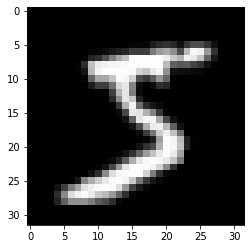

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


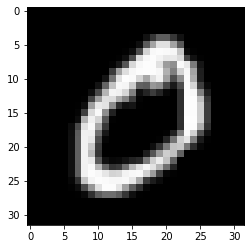

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(2):
  print(y_train[i])
  plt.imshow(x_train[i])
  plt.show()

We are going to import a pretrained model by passing weights='imagenet'. Then we are going to change the input tensor size in model so that our data which is 28x28x3 can be fed and trained, otherwise we need to resize our dataset accordingly.

In [0]:
from keras.engine.input_layer import Input
from keras.applications import vgg16
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3))) 
# base_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(28, 28, 3)))  # Changing the input shape of model ideally its different

''' Below we will be  freezing all the base model layers, so that cannot be retrained.
We can choose which layers we want to train and not train by setting the trainable flag. '''
for i, layer in enumerate(base_model.layers):
    layer.trainable = False
    # print(i, layer.name)

In [0]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# add a global spatial average pooling layer
x = base_model.output
x = Flatten()(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# and a logistic layer -- let's say we have 200 classes
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
print(model.summary())
optimizer=optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=2, verbose=1, validation_data=(x_test, y_test))

# score = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

<i>!!!!!!!! Hmm the accuracy is really bad, but we were able to ran the code, we will fine tune it later.</i>

<b>Freeze all convolution layers - use first few layers </b>


In [0]:
from keras.engine.input_layer import Input
from keras.applications import vgg16
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3))) 
# base_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(28, 28, 3)))  # Changing the input shape of model ideally its different

for i, layer in enumerate(base_model.layers):
    layer.trainable = False
    print(layer.name, layer.trainable)

input_8 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [0]:
from keras.models import Model
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Reshape, Flatten, Dropout

# x = base_model.output
x = base_model.get_layer('block3_pool').output  # Lets pick 3rd layer output
x = Flatten()(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# and a logistic layer -- let's say we have 10 classes
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
print(model.summary())
optimizer=optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=2, verbose=1, validation_data=(x_test, y_test))

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

!!! so clipping last few layers doesn't work, possible reason could be the 3rd layer might not have relevent features and if we retrain last layer our result might improve.

<b>Freeze all but last convolution layers - use all layers</b>

In [1]:
from keras.engine.input_layer import Input
from keras.applications import vgg16
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(32, 32, 3))) 
# base_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(28, 28, 3)))  # Changing the input shape of model ideally its different

for i, layer in enumerate(base_model.layers):
    layer.trainable = False
    if layer.name.startswith("block5"):
      layer.trainable = True
    print(layer.name, layer.trainable)

Using TensorFlow backend.






58892288/58889256 [==============================] - 4s 0us/step






input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [4]:
from keras.models import Model
from keras import optimizers
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Reshape, Flatten, Dropout

x = base_model.output
x = Flatten()(x)

# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
print(model.summary())
optimizer=optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#model.fit(x_train[:2000], y_train[:2000], batch_size=64, epochs=3, verbose=1, validation_data=(x_test[:2000], y_test[:2000]))
model.fit(x_train, y_train, batch_size=128, epochs=2, verbose=1, validation_data=(x_test, y_test))

# score = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

!!!! So by retraining last convolution layer scores have increased

